In [ ]:
!pip install transformers sentencepiece


In [ ]:
import pandas as pd
import torch
from transformers import MarianMTModel, MarianTokenizer
from google.colab import files

In [ ]:
print("Upload your train and dev dataset CSV files:")
uploaded = files.upload()

Upload your train and dev dataset CSV files:


TypeError: 'NoneType' object is not subscriptable

In [ ]:
def translate_text(text):
    if pd.isna(text) or text.strip() == "":
        return text  # Return as is if empty
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(model.device)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

In [ ]:
train_data

In [ ]:
dev_data

In [ ]:
train_data["translated_text"] = train_data.apply(lambda row: row["text"] if row["language"] == "en" else translate_text(row["text"]), axis=1)
dev_data["translated_text"] = dev_data.apply(lambda row: row["text"] if row["language"] == "en" else translate_text(row["text"]), axis=1)

In [ ]:
def batch_translate(text_list):
    inputs = tokenizer(text_list, return_tensors="pt", padding=True, truncation=True, max_length=256).to(model.device)
    translated = model.generate(**inputs)
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [ ]:
!pip install transformers pandas tqdm sentencepiece


In [ ]:
import pandas as pd
import torch
from tqdm import tqdm
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from google.colab import files

In [ ]:
model_name = "facebook/nllb-200-distilled-600M"  # Uses less memory than 1.3B
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

# Enable Mixed Precision (FP16) to reduce memory usage
model.half()

# Language mapping (ISO-639-1 to NLLB format)
lang_mapping = {
    "ru": "rus_Cyrl",
    "de": "deu_Latn",
    "fr": "fra_Latn",
    "es": "spa_Latn",
    "it": "ita_Latn",
    "zh": "zho_Hans",
    "ar": "arb_Arab",
    "pt": "por_Latn",
    "nl": "nld_Latn",
    "hi": "hin_Deva",
    "en": "eng_Latn"
}

In [ ]:
lang_mapping = {
    "ru": "rus_Cyrl",
    "de": "deu_Latn",
    "fr": "fra_Latn",
    "es": "spa_Latn",
    "it": "ita_Latn",
    "zh": "zho_Hans",
    "ar": "arb_Arab",
    "pt": "por_Latn",
    "nl": "nld_Latn",
    "hi": "hin_Deva",
    "en": "eng_Latn"  # English
}

In [ ]:
def batch_translate(texts, lang, batch_size=8):
    if lang == "en":
        return texts  # Skip English

    try:
        src_lang = lang_mapping.get(lang, None)
        if not src_lang:
            print(f"⚠️ Language {lang} not supported. Skipping...")
            return texts

        tokenizer.src_lang = src_lang
        translated_texts = []

        for i in tqdm(range(0, len(texts), batch_size), desc=f"Translating {lang}"):
            batch = texts[i:i+batch_size]
            inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

            with torch.no_grad():
                output = model.generate(**inputs, forced_bos_token_id=tokenizer.convert_tokens_to_ids("eng_Latn"))

            translated_texts.extend(tokenizer.batch_decode(output, skip_special_tokens=True))

        return translated_texts
    except Exception as e:
        print(f"⚠️ Translation error for {lang}: {e}")
        return texts

In [ ]:
train_data["translated_text"] = ""
dev_data["translated_text"] = ""

for lang in train_data["language"].unique():
    subset = train_data["language"] == lang
    train_data.loc[subset, "translated_text"] = batch_translate(train_data.loc[subset, "text"].tolist(), lang, batch_size=8)

for lang in dev_data["language"].unique():
    subset = dev_data["language"] == lang
    dev_data.loc[subset, "translated_text"] = batch_translate(dev_data.loc[subset, "text"].tolist(), lang, batch_size=8)

Translating de: 100%|██████████| 186/186 [07:22<00:00,  2.38s/it]


In [ ]:
train_data.to_csv("train_data_translated.csv", index=False)
dev_data.to_csv("dev_data_translated.csv", index=False)

# Provide files for download
files.download("train_data_translated.csv")
files.download("dev_data_translated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Using device: {device}")

🚀 Using device: cuda


In [ ]:
train_data.to_csv("train_data_translated.csv", index=False)
dev_data.to_csv("dev_data_translated.csv", index=False)

In [ ]:
files.download("train_data_translated.csv")
files.download("dev_data_translated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install nltk


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dev_data_translated (1).csv to dev_data_translated (1).csv
Saving train_data_translated (1).csv to train_data_translated (1).csv


In [ ]:
train_df=pd.read_csv("train_data_translated (1).csv")
dev_df=pd.read_csv("dev_data_translated (1).csv")

In [ ]:
train_df

,id,text,label,file_name,origin,type,language,split,translated_text
0,en_212,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0,247,previous_SMM4H,tweet,en,SMM4H_25_dev,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...
1,ru_4003,Этот противовирусный препарат очень уменьшает ...,0,641480_11,RuDReC,sentence,ru,SMM4H_25_dev,This antiviral drug greatly reduces the chance...
2,en_589,@USER_ @USER___ just spoke to one source: Gre...,0,655,previous_SMM4H,tweet,en,SMM4H_25_dev,@USER_ @USER___ just spoke to one source: Gre...
3,ru_10539,Ещё один день начался не с ксанакса (((,0,823729794324041732,RuDReC,tweet,ru,SMM4H_25_dev,Another day started off with a different kind ...
4,en_77,"@USER__ too bad buddy, Pfizer needs to sell so...",0,660,previous_SMM4H,tweet,en,SMM4H_25_dev,"@USER__ too bad buddy, Pfizer needs to sell so..."
...,...,...,...,...,...,...,...,...,...
4620,ru_9700,Выбирала между паксилом и бухлом на вечер с вс...,0,951824866407337984,RuDReC,tweet,ru,SMM4H_25_dev,She was choosing between a paxil and a beef fo...
4621,de_467,"Liebe <user>, so fühle ich mich auch, wie ein ...",0,227_lifeline_v1_FR_6075_0_1645953239,LREC2022,forum post,de,SMM4H_25_dev,"Dear user, I feel like a child too, but this i..."
4622,ru_9967,"пацаны, кто-нибудь жрал из вас конвалис, феназ...",0,962006522246021120,RuDReC,tweet,ru,SMM4H_25_dev,"Guys, did anyone eat convals, phenazipes, nodu..."
4623,ru_4949,Для меня это много.,0,1086939_15,RuDReC,sentence,ru,SMM4H_25_dev,That's a lot for me.


In [ ]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the Punkt Tokenizer model data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
train_df["clean_text"] = train_df["translated_text"].apply(preprocess_text)
dev_df["clean_text"] = dev_df["translated_text"].apply(preprocess_text)

In [ ]:
train_df.to_csv("preprocessed_train.csv", index=False)
dev_df.to_csv("preprocessed_dev.csv", index=False)



In [ ]:
train=pd.read_csv("preprocessed_train.csv")

In [ ]:
train

,id,text,label,file_name,origin,type,language,split,translated_text,clean_text
0,en_212,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0,247,previous_SMM4H,tweet,en,SMM4H_25_dev,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,u always take ur meds time u ever stop wo aski...
1,ru_4003,Этот противовирусный препарат очень уменьшает ...,0,641480_11,RuDReC,sentence,ru,SMM4H_25_dev,This antiviral drug greatly reduces the chance...,antiviral drug greatly reduces chances childre...
2,en_589,@USER_ @USER___ just spoke to one source: Gre...,0,655,previous_SMM4H,tweet,en,SMM4H_25_dev,@USER_ @USER___ just spoke to one source: Gre...,spoke one source green bay area sold imodium a...
3,ru_10539,Ещё один день начался не с ксанакса (((,0,823729794324041732,RuDReC,tweet,ru,SMM4H_25_dev,Another day started off with a different kind ...,another day started different kind xanax
4,en_77,"@USER__ too bad buddy, Pfizer needs to sell so...",0,660,previous_SMM4H,tweet,en,SMM4H_25_dev,"@USER__ too bad buddy, Pfizer needs to sell so...",bad buddy pfizer needs sell sildenafil citrate
...,...,...,...,...,...,...,...,...,...,...
4620,ru_9700,Выбирала между паксилом и бухлом на вечер с вс...,0,951824866407337984,RuDReC,tweet,ru,SMM4H_25_dev,She was choosing between a paxil and a beef fo...,choosing paxil beef evening every snack
4621,de_467,"Liebe <user>, so fühle ich mich auch, wie ein ...",0,227_lifeline_v1_FR_6075_0_1645953239,LREC2022,forum post,de,SMM4H_25_dev,"Dear user, I feel like a child too, but this i...",dear user feel like child crisis doctor silver...
4622,ru_9967,"пацаны, кто-нибудь жрал из вас конвалис, феназ...",0,962006522246021120,RuDReC,tweet,ru,SMM4H_25_dev,"Guys, did anyone eat convals, phenazipes, nodu...",guys anyone eat convals phenazipes nodules bac...
4623,ru_4949,Для меня это много.,0,1086939_15,RuDReC,sentence,ru,SMM4H_25_dev,That's a lot for me.,thats lot


In [ ]:
files.download("preprocessed_train.csv")
files.download("preprocessed_dev.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_df["text_length_before"] = train_df["translated_text"].apply(lambda x: len(str(x).split()))
train_df["text_length_after"] = train_df["clean_text"].apply(lambda x: len(str(x).split()))

print(train_df[['text_length_before', 'text_length_after']].describe())


       text_length_before  text_length_after
count         4625.000000        4625.000000
mean            28.408000          14.376000
std             29.463114          14.629117
min              2.000000           0.000000
25%             10.000000           6.000000
50%             18.000000           9.000000
75%             31.000000          16.000000
max            198.000000         195.000000


In [ ]:
empty_rows = train_df[train_df["clean_text"].str.strip() == ""]
print(f"Empty Rows After Preprocessing: {len(empty_rows)}")


Empty Rows After Preprocessing: 3


In [ ]:
sample_idx = 5  # Choose any row index
print("Before:", train_df.iloc[sample_idx]["translated_text"])
print("After:", train_df.iloc[sample_idx]["clean_text"])


Before: By the way, I just realized that I've been without paxil for three months, and three months is pretty heavy and full of it, and I hope I've finally gotten off my antidepressants.
After: way realized ive without paxil three months three months pretty heavy full hope ive finally gotten antidepressants


In [ ]:
stop_words = set(stopwords.words('english')) - {"not", "no"}


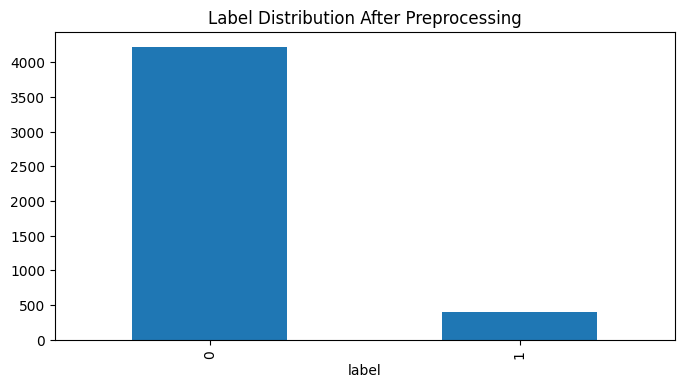

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
train_df["label"].value_counts().plot(kind="bar", title="Label Distribution After Preprocessing")
plt.show()


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
print("Before Lemmatization:", "running studies better")
print("After Lemmatization:", ' '.join([lemmatizer.lemmatize(w) for w in "running studies better".split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Before Lemmatization: running studies better
After Lemmatization: running study better


In [ ]:
print(train_df.isnull().sum())
print(dev_df.isnull().sum())


id                    0
text                  0
label                 0
file_name             0
origin                0
type                  0
language              0
split                 0
translated_text       0
clean_text            0
text_length_before    0
text_length_after     0
dtype: int64
id                 0
text               0
label              0
file_name          0
origin             0
type               0
language           0
split              0
translated_text    0
clean_text         0
dtype: int64


In [ ]:
train_df = train_df.dropna()
dev_df = dev_df.dropna()


In [ ]:
train_df

,id,text,label,file_name,origin,type,language,split,translated_text,clean_text,text_length_before,text_length_after
0,en_212,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0,247,previous_SMM4H,tweet,en,SMM4H_25_dev,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,u always take ur meds time u ever stop wo aski...,27,17
1,ru_4003,Этот противовирусный препарат очень уменьшает ...,0,641480_11,RuDReC,sentence,ru,SMM4H_25_dev,This antiviral drug greatly reduces the chance...,antiviral drug greatly reduces chances childre...,12,8
2,en_589,@USER_ @USER___ just spoke to one source: Gre...,0,655,previous_SMM4H,tweet,en,SMM4H_25_dev,@USER_ @USER___ just spoke to one source: Gre...,spoke one source green bay area sold imodium a...,25,15
3,ru_10539,Ещё один день начался не с ксанакса (((,0,823729794324041732,RuDReC,tweet,ru,SMM4H_25_dev,Another day started off with a different kind ...,another day started different kind xanax,10,6
4,en_77,"@USER__ too bad buddy, Pfizer needs to sell so...",0,660,previous_SMM4H,tweet,en,SMM4H_25_dev,"@USER__ too bad buddy, Pfizer needs to sell so...",bad buddy pfizer needs sell sildenafil citrate,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4620,ru_9700,Выбирала между паксилом и бухлом на вечер с вс...,0,951824866407337984,RuDReC,tweet,ru,SMM4H_25_dev,She was choosing between a paxil and a beef fo...,choosing paxil beef evening every snack,15,6
4621,de_467,"Liebe <user>, so fühle ich mich auch, wie ein ...",0,227_lifeline_v1_FR_6075_0_1645953239,LREC2022,forum post,de,SMM4H_25_dev,"Dear user, I feel like a child too, but this i...",dear user feel like child crisis doctor silver...,35,15
4622,ru_9967,"пацаны, кто-нибудь жрал из вас конвалис, феназ...",0,962006522246021120,RuDReC,tweet,ru,SMM4H_25_dev,"Guys, did anyone eat convals, phenazipes, nodu...",guys anyone eat convals phenazipes nodules bac...,9,7
4623,ru_4949,Для меня это много.,0,1086939_15,RuDReC,sentence,ru,SMM4H_25_dev,That's a lot for me.,thats lot,5,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
dev_df["label"] = label_encoder.transform(dev_df["label"])  # Use same encoder


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Set a fixed max_length for both train and dev data during tokenization
max_length = 128  # Choose an appropriate value based on your data

X_train = tokenizer(list(train_df["clean_text"]),
                    padding="max_length",  # Pad to max_length
                    truncation=True,
                    max_length=max_length,
                    return_tensors="pt")

X_dev = tokenizer(list(dev_df["clean_text"]),
                  padding="max_length",  # Pad to max_length
                  truncation=True,
                  max_length=max_length,
                  return_tensors="pt")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Get the numerical representation of the tokenized input
X_train_input_ids = X_train['input_ids']
X_dev_input_ids = X_dev['input_ids']

# Convert the PyTorch tensors to NumPy arrays for scikit-learn
X_train_np = X_train_input_ids.numpy()
X_dev_np = X_dev_input_ids.numpy()

model = LogisticRegression()

# Reshape the input data to 2D if necessary
# Assuming X_train_np and train_df["label"] have the same number of samples
model.fit(X_train_np, train_df["label"])

# Similarly, reshape X_dev_np if necessary
preds = model.predict(X_dev_np)

print("Accuracy:", accuracy_score(dev_df["label"], preds))

Accuracy: 0.9197742649180748


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dev_df["prediction"] = preds
dev_df[["file_name", "prediction"]].to_csv("sample_submission.csv", index=False)


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from datasets import Dataset as HFDataset

In [ ]:
train_df=pd.read_csv("preprocessed_train.csv")
dev_df=pd.read_csv("preprocessed_dev.csv")

# Step 2: Select Model (Use MEDBERT, BioBERT, or BERT-base)
MODEL_NAME = "bert-base-uncased"  # Change to "nmlab-medbert" or "dmis-lab/biobert-base-cased-v1.1" if needed

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
def tokenize_function(example):
    return tokenizer(example["translated_text"], padding="max_length", truncation=True, max_length=512)

In [ ]:
train_dataset = HFDataset.from_pandas(train_df)
dev_dataset = HFDataset.from_pandas(dev_df)

train_dataset = train_dataset.map(tokenize_function, batched=True)
dev_dataset = dev_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/4625 [00:00<?, ? examples/s]

Map:   0%|          | 0/31187 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_dataset.remove_columns(["text", "file_name", "origin", "type", "language", "split"])
dev_dataset = dev_dataset.remove_columns(["text", "file_name", "origin", "type", "language", "split"])


In [ ]:
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
dev_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
)

# Step 6: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from huggingface_hub import login
login()


In [ ]:


trainer.train()

# Step 8: Evaluate Model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

Epoch,Training Loss,Validation Loss
1,0.238800,0.259518
2,0.286800,0.198915
3,0.156000,0.269922
4,0.045600,0.352121
5,0.070100,0.385892


Evaluation Results: {'eval_loss': 0.19891494512557983, 'eval_runtime': 948.6562, 'eval_samples_per_second': 32.875, 'eval_steps_per_second': 2.056, 'epoch': 5.0}


In [ ]:
# Get model predictions
predictions = trainer.predict(dev_dataset)

# Convert logits to class labels
pred_labels = np.argmax(predictions.predictions, axis=1)

# Add Predictions to DataFrame
dev_df["predicted_label"] = pred_labels

# Save predictions for submission
dev_df.to_csv("dev_predictions.csv", index=False)
print("Predictions saved to dev_predictions.csv")


KeyboardInterrupt: 

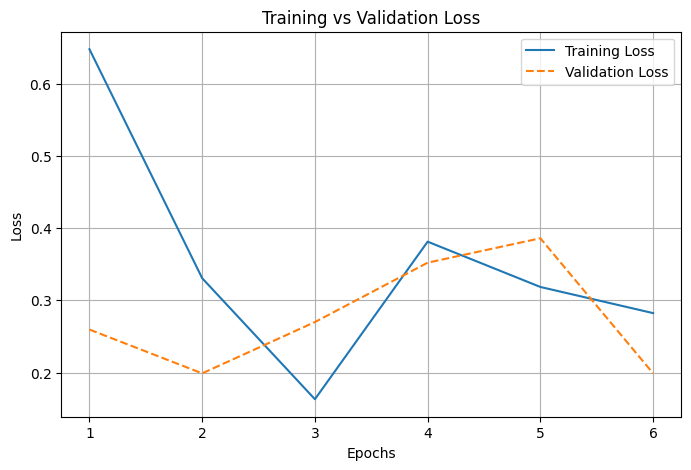

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss values
train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
val_loss = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

# Find the minimum length to match both lists
min_length = min(len(train_loss), len(val_loss))

# Trim lists to the same size
train_loss = train_loss[:min_length]
val_loss = val_loss[:min_length]

# Plot the losses
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", linestyle="dashed")

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [ ]:
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save model
model.save_pretrained("/content/drive/MyDrive/saved_model")
tokenizer.save_pretrained("/content/drive/MyDrive/saved_model")

Mounted at /content/drive


('/content/drive/MyDrive/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/saved_model/vocab.txt',
 '/content/drive/MyDrive/saved_model/added_tokens.json',
 '/content/drive/MyDrive/saved_model/tokenizer.json')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_dev.csv to preprocessed_dev.csv
Saving preprocessed_train.csv to preprocessed_train.csv


In [ ]:
train_df = pd.read_csv("preprocessed_train.csv")
dev_df = pd.read_csv("preprocessed_dev.csv")

# Drop missing values in 'clean_text'
# Drop missing values
train_df = train_df.dropna(subset=['clean_text'])
dev_df = dev_df.dropna(subset=['clean_text'])

# Feature Extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,3))
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_dev = vectorizer.transform(dev_df['clean_text'])
y_train = train_df['label']

In [ ]:

# Drop missing values
train_df = train_df.dropna(subset=['clean_text'])
dev_df = dev_df.dropna(subset=['clean_text'])

# Feature Extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,3))
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_dev = vectorizer.transform(dev_df['clean_text'])
y_train = train_df['label']

# Handle class imbalance using SMOTE
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights for imbalanced data
# Convert classes to a NumPy array
import numpy as np  # Import NumPy if not already imported
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train SVM with optimized settings
svm_model = SVC(kernel='linear', probability=True, class_weight=class_weight_dict)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
svm_preds = svm_model.predict(X_dev)

NameError: name 'train_df' is not defined

In [ ]:
print("Classification Report:\n", classification_report(dev_df['label'], svm_preds, digits=4))

# Save predictions
submission_df = pd.DataFrame({"id": dev_df["id"], "predicted_label": svm_preds})
submission_df.to_csv("final_predictions_optimized.csv", index=False)

print("Optimized predictions saved as final_predictions_optimized.csv")

Classification Report:
               precision    recall  f1-score   support

           0     0.9426    0.9420    0.9423     28724
           1     0.3256    0.3280    0.3268      2451

    accuracy                         0.8938     31175
   macro avg     0.6341    0.6350    0.6346     31175
weighted avg     0.8941    0.8938    0.8939     31175

Optimized predictions saved as final_predictions_optimized.csv


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Apply SMOTE with higher positive class ratio
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute updated class weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Retrain the model
svm_model = SVC(kernel='linear', probability=True, class_weight=class_weight_dict, C=0.8)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
svm_preds = svm_model.predict(X_dev)
print("Updated Classification Report:\n", classification_report(dev_df['label'], svm_preds, digits=4))


Updated Classification Report:
               precision    recall  f1-score   support

           0     0.9450    0.9330    0.9389     28724
           1     0.3164    0.3635    0.3383      2451

    accuracy                         0.8882     31175
   macro avg     0.6307    0.6483    0.6386     31175
weighted avg     0.8956    0.8882    0.8917     31175



In [ ]:
submission_df = pd.DataFrame({"id": dev_df["id"], "predicted_label": svm_preds})
submission_df.to_csv("final_predictions_optimized.csv", index=False)


In [ ]:
import pandas as pd

# Load the predictions file
file_path = "final_predictions.csv"  # Ensure the correct path if uploaded manually
predictions_df = pd.read_csv(file_path)

# Display the first few rows to check the structure
print(predictions_df)


             id  predicted_label
0       en_2576                0
1       ru_4096                0
2      en_14135                0
3      ru_11007                0
4      en_11440                1
...         ...              ...
31170   ru_2025                0
31171   en_2931                0
31172    de_860                0
31173  en_13336                0
31174   ru_1146                0

[31175 rows x 2 columns]


In [ ]:
files.download("final_predictions_optimized.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load files
true_labels_df = pd.read_csv("preprocessed_dev.csv")
predictions_df = pd.read_csv("final_predictions.csv")

# Print column names
print("Columns in true_labels_df:", true_labels_df.columns)
print("Columns in predictions_df:", predictions_df.columns)


Columns in true_labels_df: Index(['id', 'text', 'label', 'file_name', 'origin', 'type', 'language',
       'split', 'translated_text', 'clean_text'],
      dtype='object')
Columns in predictions_df: Index(['id', 'predicted_label'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the files
true_labels_df = pd.read_csv("preprocessed_dev.csv")  # Ground truth labels
predictions_df = pd.read_csv("final_predictions.csv")  # Model predictions

# Merge on the 'id' column
merged_df = pd.merge(true_labels_df[['id', 'label']], predictions_df, on='id', how='inner')

# Print sample to check merging
print(merged_df.head())

# Compute classification report
print("\nClassification Report:")
print(classification_report(merged_df['label'], merged_df['predicted_label'], digits=4))


         id  label  predicted_label
0   en_2576      1                0
1   ru_4096      0                0
2  en_14135      0                0
3  ru_11007      0                0
4  en_11440      1                1

Classification Report:
              precision    recall  f1-score   support

           0     0.9232    0.9990    0.9596     28724
           1     0.6989    0.0265    0.0511      2451

    accuracy                         0.9226     31175
   macro avg     0.8111    0.5128    0.5054     31175
weighted avg     0.9056    0.9226    0.8882     31175



In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from torch.nn import functional as F
from sklearn.metrics import f1_score, precision_recall_fscore_support

In [ ]:
train_df = pd.read_csv("preprocessed_train.csv")
dev_df = pd.read_csv("preprocessed_dev.csv")


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenization Function
def tokenize_function(examples):
    clean_texts = [str(text) for text in examples["clean_text"]]
    return tokenizer(clean_texts, padding="max_length", truncation=True, max_length=128)
# Convert DataFrame to Dataset
dataset_train = Dataset.from_pandas(train_df[['clean_text', 'label']])
dataset_dev = Dataset.from_pandas(dev_df[['clean_text', 'label']])

dataset_train = dataset_train.map(tokenize_function, batched=True)
dataset_dev = dataset_dev.map(tokenize_function, batched=True)

# Load Pre-trained BERT Model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Compute Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {"precision": precision, "recall": recall, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_dev,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train Model
trainer.train()

Map:   0%|          | 0/4625 [00:00<?, ? examples/s]

Map:   0%|          | 0/31187 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-598ddbb42d5f>:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wan

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bhammar2111 (bhammar2111-srm-institute-of-science-and-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,0.228400,0.245690,0.531516,0.127295,0.205398
2,0.250500,0.212328,0.521704,0.264790,0.351286
3,0.105000,0.309960,0.366388,0.518564,0.429392
4,0.025700,0.381003,0.437198,0.369237,0.400354
5,0.120400,0.385408,0.454594,0.347205,0.393708


TrainOutput(global_step=1450, training_loss=0.17111904583100615, metrics={'train_runtime': 2052.0895, 'train_samples_per_second': 11.269, 'train_steps_per_second': 0.707, 'total_flos': 1521110788800000.0, 'train_loss': 0.17111904583100615, 'epoch': 5.0})